<a href="https://colab.research.google.com/github/Yoshibansal/ML-basics/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST (Multi class classifier) (using CNN)

Learned how to do classificaiton using MNIST, a data set containing items of handwriting -- the digits 0 through 9.

Each example is a 28x28 grayscale image, associated with a label from 10 classes. The MNIST database contains 60,000 training images and 10,000 testing images

In [1]:
#importing tesnorflow

import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
#load module fashion_mnist from tensorflow
mnist = tf.keras.datasets.mnist

In [3]:
#loading data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Training label:  5


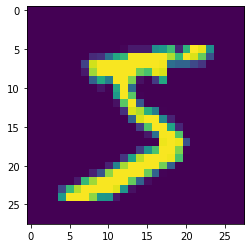

In [4]:
import matplotlib.pyplot as plt

index = 0

#plotting image corresponds to grid/matrix of pixel value at index
plt.imshow(training_images[index])

#label for matrix at index
print("Training label: ", training_labels[index])

#metrix
#print(training_images[index])

In [5]:
# normalizing data
training_images = training_images/255.0
test_images = test_images/255.0

#reshaping data
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [6]:
INPUT_SHAPE = (28, 28, 1)

#model architecture

#change the number of layers in the model, will increase depth therefore increase accuracy
model = tf.keras.Sequential([
                             #Convolution layer (CNN)
                             tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE),
                             #MaxPooling layer
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(
              optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
    )

In [7]:
# Summary method allows you to inspect the layers of the model 
        # and see the journey of the model through the convolution
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [8]:
#stop training when reached a desired value

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):   #logs contains lots of information about current training
    if(logs.get('accuracy') > 0.99):    #check for accuracy..... you can do same for loss (keyword:- 'loss')
      print("\n\nReached 99% accuracy!!!\n")
      self.model.stop_training = True

In [9]:
#training model

callbacks = myCallback() #instance of class myCallback
epoch = 15 #hyperparameter

history = model.fit(training_images, training_labels, epochs=epoch, callbacks=[callbacks])
#this will take 2-5 minutes

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1335 - accuracy: 0.9592
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9856
Epoch 3/15
1870/1875 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9908

Reached 99% accuracy!!!

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0289 - accuracy: 0.9908


In [10]:
#evaluating the model on test data

test_loss, test_acc = model.evaluate(test_images, test_labels)

#printing the loss and accuracy of trained model on test dataset
print("loss on test data: ", test_loss)
print('accuracy on test data: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9858
loss on test data:  0.0421198345720768
accuracy on test data:  0.98580002784729


##PLOT loss and accuracy

In [11]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


<Figure size 432x288 with 0 Axes>

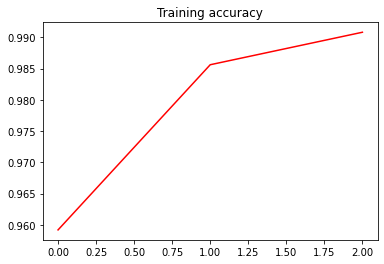

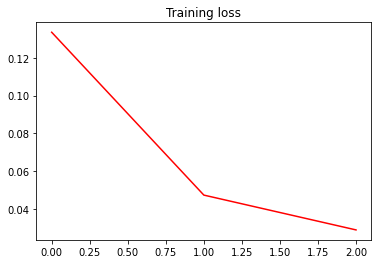

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline

import matplotlib.image as mping
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

#plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.title('Training accuracy')
plt.figure()

#plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training loss")
plt.title('Training loss')
plt.figure()

You can skip the following part

#Visualizing the convolutions and pooling

The keras API gives us each convolution, each pooling, each dense etc as a layer. So with the layers API we can take a look at each layer's outputs. So we will create a list of each layer's output. 

In [13]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


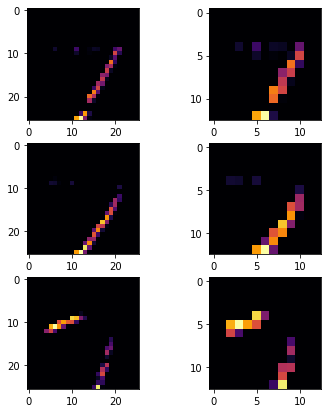

In [14]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3, 2, figsize=(6, 7))

#taking images of 7
FIRST_IMAGE = 0
SECOND_IMAGE = 17
THIRD_IMAGE = 26

CONVOLUTION_NUMBER = 1  #channel

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,2):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)